In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [18]:
# use the data that we do EDA
df = pd.read_csv("root/Dataset/Fraud_sample.csv")

### 5. Preprocessing

In [19]:
df.isna().sum()

step                   0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest         0
newbalanceDest         0
isFraud                0
isFlaggedFraud         0
type_CASH_IN           0
type_CASH_OUT          0
type_DEBIT             0
type_PAYMENT           0
type_TRANSFER          0
blacklist_flag_org     0
blacklist_flag_dest    0
dtype: int64

In [20]:
ratio = df['isFraud'].value_counts(normalize=True)
print(ratio)

0    0.991854
1    0.008146
Name: isFraud, dtype: float64


In [21]:
df_new = df.drop(columns = ['step', 'isFlaggedFraud','nameOrig', 'nameDest','isFraud','oldbalanceOrg','oldbalanceDest'], axis = 'columns')

In [22]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
0,282,464600.35,C469131495,11028.00,0.00,C342883661,35315.32,499915.66,0,0,0.0,0.0,0.0,0.0,1.0,0,0
1,212,2517.63,C1525615562,106528.89,104011.26,M600929596,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0,0,0
2,235,57789.09,C1551452782,5555.00,0.00,C1662050128,0.00,57789.09,0,0,0.0,1.0,0.0,0.0,0.0,0,0
3,371,7698.26,C1776033547,0.00,0.00,M1370947243,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0,0,0
4,350,129727.76,C1741301290,10331.00,140058.76,C1909391927,0.00,0.00,0,0,1.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008208,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.0,1.0,0.0,0.0,0.0,0,0
1008209,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0,0,0
1008210,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0.0,1.0,0.0,0.0,0.0,0,0
1008211,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0,0,0


In [23]:
df_new

,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
0,464600.35,0.00,499915.66,0.0,0.0,0.0,0.0,1.0,0,0
1,2517.63,104011.26,0.00,0.0,0.0,0.0,1.0,0.0,0,0
2,57789.09,0.00,57789.09,0.0,1.0,0.0,0.0,0.0,0,0
3,7698.26,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0,0
4,129727.76,140058.76,0.00,1.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
1008208,339682.13,0.00,339682.13,0.0,1.0,0.0,0.0,0.0,0,0
1008209,6311409.28,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0
1008210,6311409.28,0.00,6379898.11,0.0,1.0,0.0,0.0,0.0,0,0
1008211,850002.52,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0


In [24]:
X = df_new

# Assign selling price as label
y = df["isFraud"]

In [25]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1008208    1
1008209    1
1008210    1
1008211    1
1008212    1
Name: isFraud, Length: 1008213, dtype: int64

In [26]:
# Split the data to training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y,random_state = 42, shuffle=True)

In [27]:
y_train.value_counts(normalize=True)

0    0.991854
1    0.008146
Name: isFraud, dtype: float64

In [28]:
y_test.value_counts(normalize=True)

0    0.991857
1    0.008143
Name: isFraud, dtype: float64

In [ ]:
X_train

,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
975876,2651311.96,0.00,4819759.86,0.0,0.0,0.0,0.0,1.0,0,0
801687,1241.59,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0,0
718506,58031.55,0.00,261488.17,0.0,1.0,0.0,0.0,0.0,0,0
799730,17472.12,1749661.79,1330758.19,1.0,0.0,0.0,0.0,0.0,0,0
593304,4525.44,115713.56,0.00,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
939163,16499.80,409987.23,0.00,0.0,0.0,0.0,1.0,0.0,0,0
749364,183165.17,0.00,867536.70,0.0,1.0,0.0,0.0,0.0,0,0
58220,67438.42,10146.38,0.00,0.0,0.0,0.0,1.0,0.0,0,0
742080,215443.17,0.00,1266678.96,0.0,1.0,0.0,0.0,0.0,0,0


In [ ]:
y_train

975876    0
801687    0
718506    0
799730    0
593304    0
         ..
939163    0
749364    0
58220     0
742080    0
896628    0
Name: isFraud, Length: 907391, dtype: int64

In [ ]:
smote = SMOTE(random_state=42,sampling_strategy=0.1)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts(normalize=True)

0    0.909092
1    0.090908
Name: isFraud, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.991857
1    0.008143
Name: isFraud, dtype: float64

In [ ]:
y_train.value_counts()

0    899999
1     89999
Name: isFraud, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale only numeric column
scaler = StandardScaler()
X_train[['amount',  'newbalanceOrig', 'newbalanceDest']] = scaler.fit_transform(X_train[['amount',  'newbalanceOrig', 'newbalanceDest']])
X_test[['amount',  'newbalanceOrig', 'newbalanceDest']]  = scaler.transform(X_test[['amount',  'newbalanceOrig', 'newbalanceDest']])


In [ ]:
X_train

,amount,newbalanceOrig,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,blacklist_flag_org,blacklist_flag_dest
0,2.365365,-0.278506,0.984322,0.0,0.0,0.0,0.0,1.0,0,0
1,-0.295199,-0.278506,-0.336363,0.0,0.0,0.0,1.0,0.0,0,0
2,-0.238184,-0.278506,-0.264711,0.0,1.0,0.0,0.0,0.0,0,0
3,-0.278904,0.335692,0.028284,1.0,0.0,0.0,0.0,0.0,0,0
4,-0.291902,-0.237886,-0.336363,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
989993,-0.102100,-0.278506,-0.336363,0.0,0.0,0.0,0.0,1.0,0,0
989994,6.381597,-0.278506,1.500332,0.0,1.0,0.0,0.0,0.0,0,0
989995,-0.026079,-0.278506,-0.103917,0.0,1.0,0.0,0.0,0.0,0,0
989996,1.778741,-0.278506,0.230026,0.0,1.0,0.0,0.0,0.0,0,0


In [ ]:
# save the scaler value for using on app
import pickle

pickle.dump(scaler, open('root/scaler_balance.pkl', 'wb'))

In [ ]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://mlflow:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "noppawee"
#mlflow.create_experiment(name="noppawee-ML-project1")  #create if you haven't create
mlflow.set_experiment(experiment_name="noppawee-ML-project-final")

<Experiment: artifact_location='mlflow-artifacts:/154179598935460032', creation_time=1701072492887, experiment_id='154179598935460032', last_update_time=1701072492887, lifecycle_stage='active', name='noppawee-ML-project-final', tags={}>

In [ ]:
# # Model with imbalance class
# ##Baselines
# from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification
# from sklearn.naive_bayes import GaussianNB  #drawing a line based on probability

# ##Complex
# from sklearn.ensemble import RandomForestClassifier  #using trees to classify

# #model
# lr = LogisticRegression(solver = 'liblinear',random_state=999)
# rf = RandomForestClassifier(random_state=999)
# gnb = GaussianNB()
# models = [lr,gnb, rf]

# #3.2 perform cross validation using KFold
# from sklearn.model_selection import KFold, cross_val_score

# kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

# for model in models:
#     if model == lr:
#         mlflow.start_run(run_name="Logistic Regression with SMOTE balance class")
#         mlflow.log_params(params={"model":"Logistic Regression"})
#     elif model == rf:
#         mlflow.start_run(run_name="Random Forest with SMOTE balance class")
#         mlflow.log_params(params={"model":"Random Forest"})
#     elif model == gnb:
#         mlflow.start_run(run_name="Naive Bayesian - Gaussian with SMOTE balance class")
#         mlflow.log_params(params={"model":"Naive Bayesian - Gaussian"})
    
#     score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')  #f1, recall, precision, accuracy
#     print("model: ", model,"macro f1 Scores: ", score, "- macro f1 Scores mean: ", score.mean(), "- macro f1 Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
#     mlflow.log_metric(key="macro_f1_score_mean", value=score.mean())
#     mlflow.log_metric(key="macro_f1_score_std", value=score.std())

#     model.fit(X_train, y_train)

#     signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
#     mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
    
                

#     mlflow.end_run()


In [ ]:
# # Model with imbalance class

# import xgboost as xgb

# #model

# xgbr = xgb.XGBClassifier(random_state = 999, learning_rate = 0.1)
# models = [xgbr]

# #3.2 perform cross validation using KFold
# from sklearn.model_selection import KFold, cross_val_score

# kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

# for model in models:
#     mlflow.start_run(run_name="XGboost with SMOTE balance class")
#     mlflow.log_params(params={"model":"XGboost"})
    
#     score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')  #f1, recall, precision, accuracy
#     print("model: ", model,"macrof1 Scores: ", score, "- macro f1 Scores mean: ", score.mean(), "- macro f1 Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
#     mlflow.log_metric(key="macro_f1_score_mean", value=score.mean())
#     mlflow.log_metric(key="macro_f1_score_std", value=score.std())

#     model.fit(X_train, y_train)

#     signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
#     mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
    
                

#     mlflow.end_run()


In [ ]:
# # Model with imbalance class
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier

# #model
# gb = GradientBoostingClassifier(random_state=999)
# ada = AdaBoostClassifier(random_state=999)
# models = [gb,ada]

# #3.2 perform cross validation using KFold
# from sklearn.model_selection import KFold, cross_val_score

# kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

# for model in models:
#     if model == gb:
#         mlflow.start_run(run_name="Gradient Boosting with SMOTE balance class")
#         mlflow.log_params(params={"model":"Gradient Boosting"})
#     elif model == ada:
#         mlflow.start_run(run_name="AdaBoost with SMOTE balance class")
#         mlflow.log_params(params={"model":"AdaBoost"})
    
#     score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_macro')  #f1, recall, precision, accuracy
#     print("model: ", model,"f1 Scores: ", score, "- mocro f1 Scores mean: ", score.mean(), "- macro f1 Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
#     mlflow.log_metric(key="macro_f1_score_mean", value=score.mean())
#     mlflow.log_metric(key="macro_f1_score_std", value=score.std())
    
#     model.fit(X_train, y_train)

#     signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
#     mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
    
                

#     mlflow.end_run()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
from sklearn.model_selection import KFold, cross_val_score





from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [1,3,5],
              'n_estimators': [20, 40, 60]}

rf = RandomForestClassifier(random_state = 999)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = 3, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='f1_macro')

# Fit your grid_search to loop all the possible parameters
grid.fit(X_train, y_train)

# xgbr = xgb.XGBClassifier(random_state=999)

# # Define the hyperparameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
# }

# # Create a GridSearchCV object
# grid = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='f1', cv=3, verbose=1)

# # Fit the grid search to the data
# grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid.best_params_)

# Get the best model
best_xgb = grid.best_estimator_

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the performance of the best model
f1 =f1_score(y_test, y_pred)
print("f1 score:", f1)

Best hyperparameters: {'bootstrap': True, 'max_depth': 8, 'n_estimators': 20}
f1 score: 0.7599999999999999


: 

In [ ]:
filename = '/root/random_SMOTE.pkl'
pickle.dump(grid, open(filename, 'wb'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100001
           1       0.90      0.69      0.78       821

    accuracy                           1.00    100822
   macro avg       0.95      0.85      0.89    100822
weighted avg       1.00      1.00      1.00    100822



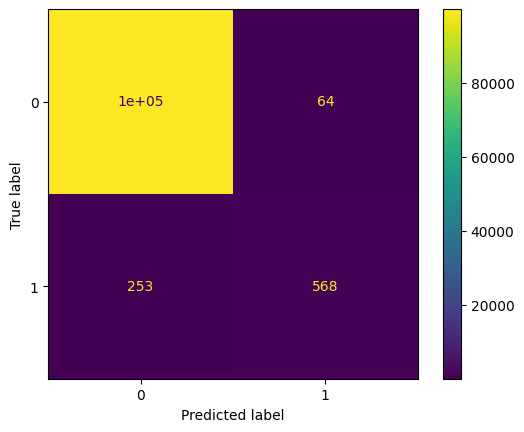

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load a model from MLflow
#model = mlflow.pyfunc.load_model('runs:/bcfe7355b51e4e439ff31f4ab3850780/model/')
ypred = grid.predict(X_test)

# print(accuracy_score(y_test, ypred))
# print(precision_score(y_test, ypred))
# print(recall_score(y_test, ypred))
# print(f1_score(y_test, ypred))

# print classification report
print(classification_report(y_test, ypred))

#display confusion matrix
cm = confusion_matrix(y_test, ypred)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

cmp.plot()
